# Simple state space model for primary voting intention

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Load-primary-vote-polling-data" data-toc-modified-id="Load-primary-vote-polling-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load primary vote polling data</a></span></li><li><span><a href="#Bayesian-aggregation" data-toc-modified-id="Bayesian-aggregation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bayesian aggregation</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Warnings</a></span></li></ul></div>

## Python set-up

In [1]:
# Data science imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import arviz as az
import stan # install with pip - conda is problematic on the M1 MBP

# local imports
import common
from common import COLOR_COALITION, COLOR_LABOR, COLOR_OTHER, COLOR_GREEN
from common import P_COLOR_COALITION, P_COLOR_LABOR, P_COLOR_OTHER, P_COLOR_GREEN

In [2]:
# enable pystan on jupyter notebook
import nest_asyncio
nest_asyncio.apply()

In [3]:
# path to the model data
DATA_DIR = '../data/'

In [4]:
# plotting stuff
# Minimum polls requirement
MIMIMUM_POLLS_FROM_POLLSTER = 2

# Plot descriptor
s_args = {'lfooter': 'Polling data from Wikipedia; '
          f'Pollsters ignored with < {MIMIMUM_POLLS_FROM_POLLSTER} polls.'}

plt.style.use('./markgraph.mplstyle')

## Load primary vote polling data

In [5]:
# Check the data file has been updated today
data_file = f'{DATA_DIR}primary_vote.csv'
common.check_file_current(data_file, 
    'Make sure you run the data capture notebook first')

In [6]:
pv = pd.read_csv(data_file, parse_dates=['Mean Date'], index_col=0)
pv.columns

Index(['Primary vote L/NP', 'Primary vote ALP', 'Primary vote GRN',
       'Primary vote ONP', 'Primary vote OTH', 'Date', 'Mean Date', 'Brand',
       'Interview mode', 'Sample size', 'Calculated 2pp L/NP',
       'Calculated 2pp ALP'],
      dtype='object')

In [7]:
pv['Primary vote OTH'] += pv['Primary vote ONP'].fillna(0)
del pv['Primary vote ONP']

In [8]:
len(pv)

107

In [9]:
# Check nothing is missing ...
pv[['Mean Date', 'Primary vote L/NP', 'Primary vote ALP', 'Primary vote GRN', 'Primary vote OTH']].isna().sum()

Mean Date            0
Primary vote L/NP    0
Primary vote ALP     0
Primary vote GRN     0
Primary vote OTH     0
dtype: int64

In [10]:
# Number of polls from each pollster
brand_counts = pv['Brand'].value_counts()
brand_counts

Newspoll-YouGov                   40
Essential                         38
Roy Morgan                        20
Resolve Strategic                  8
Australian National University     1
Name: Brand, dtype: int64

In [11]:
# Remove pollsters with minimal polling history
keep = brand_counts[brand_counts >= MIMIMUM_POLLS_FROM_POLLSTER].index
pv = pv[pv['Brand'].isin(keep)]
pv['Brand'].value_counts()

Newspoll-YouGov      40
Essential            38
Roy Morgan           20
Resolve Strategic     8
Name: Brand, dtype: int64

In [12]:
len(pv)

106

## Bayesian aggregation

Building: found in cache, done.
Messages from stanc:
Sampling:   0%


Coalition Primary vote L/NP Coalition
Stan version: 3.3.0


Sampling:   0% (1/14000)
Sampling:   0% (2/14000)
Sampling:   0% (3/14000)
Sampling:   0% (4/14000)
Sampling:   1% (103/14000)
Sampling:   1% (202/14000)
Sampling:   2% (301/14000)
Sampling:   3% (400/14000)
Sampling:   4% (500/14000)
Sampling:   4% (600/14000)
Sampling:   5% (700/14000)
Sampling:   6% (800/14000)
Sampling:   6% (900/14000)
Sampling:   7% (1000/14000)
Sampling:   8% (1100/14000)
Sampling:   9% (1200/14000)
Sampling:   9% (1300/14000)
Sampling:  10% (1400/14000)
Sampling:  11% (1500/14000)
Sampling:  11% (1600/14000)
Sampling:  12% (1700/14000)
Sampling:  13% (1800/14000)
Sampling:  14% (1900/14000)
Sampling:  14% (2000/14000)
Sampling:  15% (2100/14000)
Sampling:  16% (2200/14000)
Sampling:  16% (2300/14000)
Sampling:  17% (2400/14000)
Sampling:  18% (2500/14000)
Sampling:  19% (2600/14000)
Sampling:  19% (2700/14000)
Sampling:  20% (2800/14000)
Sampling:  21% (2900/14000)
Sampling:  21% (3000/14000)
Sampling:  22% (3100/14000)
Sampling:  23% (3200/14000)
Sampling:  24

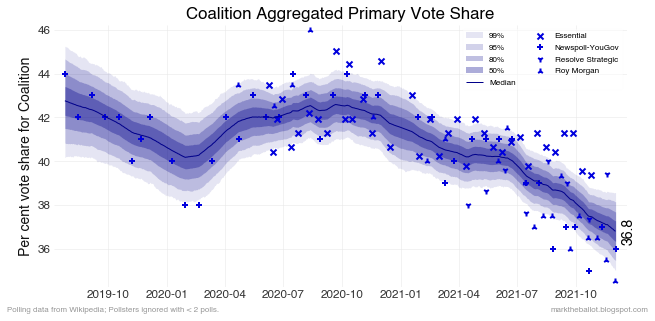

0
Essential            0.669279
Newspoll-YouGov     -0.137112
Resolve Strategic   -0.258975
Roy Morgan          -0.273770
Name: 0.5, dtype: float64


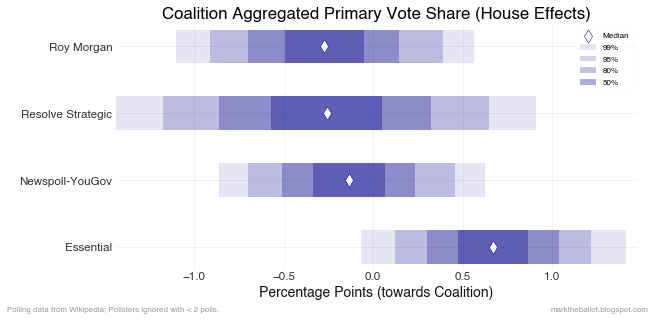

Building: found in cache, done.
Messages from stanc:
Sampling:   0%


Labor Primary vote ALP Labor
Stan version: 3.3.0


Sampling:   0% (1/14000)
Sampling:   0% (2/14000)
Sampling:   0% (3/14000)
Sampling:   0% (4/14000)
Sampling:   1% (103/14000)
Sampling:   1% (202/14000)
Sampling:   2% (301/14000)
Sampling:   3% (400/14000)
Sampling:   4% (500/14000)
Sampling:   4% (600/14000)
Sampling:   5% (700/14000)
Sampling:   6% (800/14000)
Sampling:   6% (900/14000)
Sampling:   7% (1000/14000)
Sampling:   8% (1100/14000)
Sampling:   9% (1200/14000)
Sampling:   9% (1300/14000)
Sampling:  10% (1400/14000)
Sampling:  11% (1500/14000)
Sampling:  11% (1600/14000)
Sampling:  12% (1700/14000)
Sampling:  13% (1800/14000)
Sampling:  14% (1900/14000)
Sampling:  14% (2000/14000)
Sampling:  15% (2100/14000)
Sampling:  16% (2200/14000)
Sampling:  16% (2300/14000)
Sampling:  17% (2400/14000)
Sampling:  18% (2500/14000)
Sampling:  19% (2600/14000)
Sampling:  19% (2700/14000)
Sampling:  20% (2800/14000)
Sampling:  21% (2900/14000)
Sampling:  21% (3000/14000)
Sampling:  22% (3100/14000)
Sampling:  23% (3200/14000)
Sampling:  24

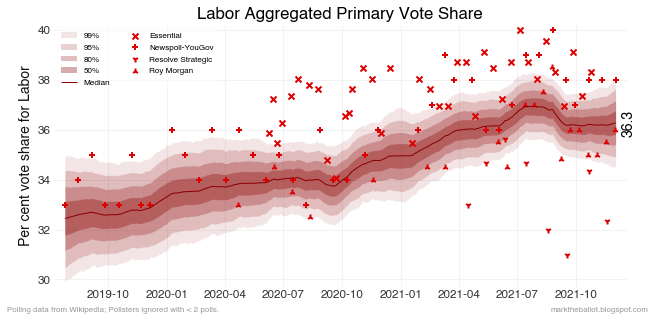

0
Essential            2.236357
Newspoll-YouGov      1.174084
Resolve Strategic   -2.887386
Roy Morgan          -0.527862
Name: 0.5, dtype: float64


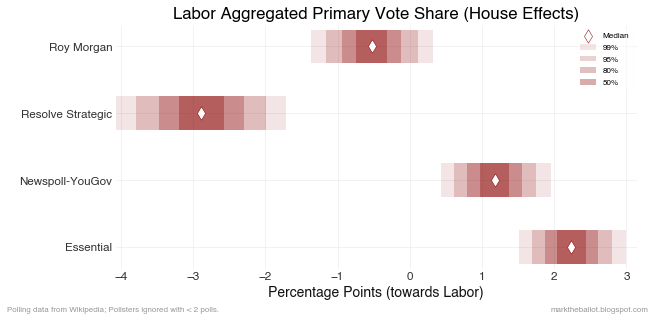

Building: found in cache, done.
Messages from stanc:
Sampling:   0%


Greens Primary vote GRN Greens
Stan version: 3.3.0


Sampling:   0% (1/14000)
Sampling:   0% (2/14000)
Sampling:   0% (3/14000)
Sampling:   0% (4/14000)
Sampling:   1% (103/14000)
Sampling:   1% (202/14000)
Sampling:   2% (301/14000)
Sampling:   3% (400/14000)
Sampling:   4% (500/14000)
Sampling:   4% (600/14000)
Sampling:   5% (700/14000)
Sampling:   6% (800/14000)
Sampling:   6% (900/14000)
Sampling:   7% (1000/14000)
Sampling:   8% (1100/14000)
Sampling:   9% (1200/14000)
Sampling:   9% (1300/14000)
Sampling:  10% (1400/14000)
Sampling:  11% (1500/14000)
Sampling:  11% (1600/14000)
Sampling:  12% (1700/14000)
Sampling:  13% (1800/14000)
Sampling:  14% (1900/14000)
Sampling:  14% (2000/14000)
Sampling:  15% (2100/14000)
Sampling:  16% (2200/14000)
Sampling:  16% (2300/14000)
Sampling:  17% (2400/14000)
Sampling:  18% (2500/14000)
Sampling:  19% (2600/14000)
Sampling:  19% (2700/14000)
Sampling:  20% (2800/14000)
Sampling:  21% (2900/14000)
Sampling:  21% (3000/14000)
Sampling:  22% (3100/14000)
Sampling:  23% (3200/14000)
Sampling:  24

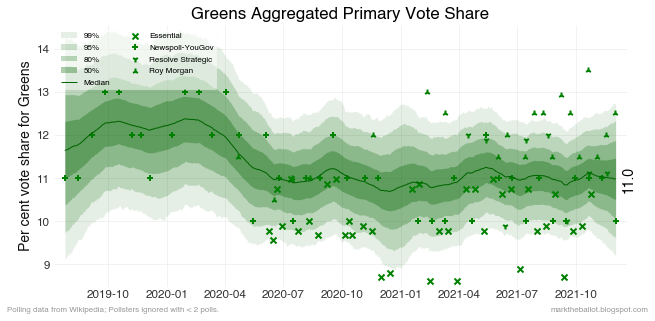

0
Essential           -0.988739
Newspoll-YouGov     -0.160244
Resolve Strategic    0.177833
Roy Morgan           0.961528
Name: 0.5, dtype: float64


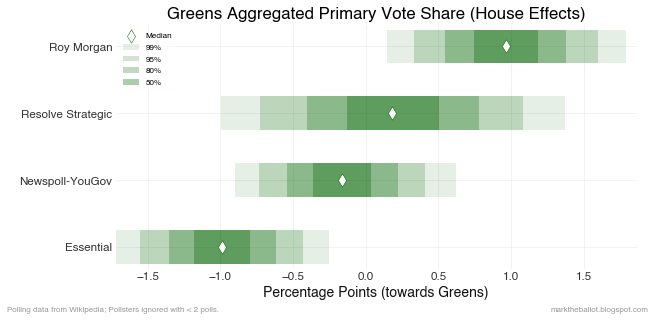

Building: found in cache, done.
Messages from stanc:
Sampling:   0%


Others Primary vote OTH Others
Stan version: 3.3.0


Sampling:   0% (1/14000)
Sampling:   0% (2/14000)
Sampling:   0% (3/14000)
Sampling:   0% (4/14000)
Sampling:   1% (103/14000)
Sampling:   1% (202/14000)
Sampling:   2% (301/14000)
Sampling:   3% (400/14000)
Sampling:   4% (500/14000)
Sampling:   4% (600/14000)
Sampling:   5% (700/14000)
Sampling:   6% (800/14000)
Sampling:   6% (900/14000)
Sampling:   7% (1000/14000)
Sampling:   8% (1100/14000)
Sampling:   9% (1200/14000)
Sampling:   9% (1300/14000)
Sampling:  10% (1400/14000)
Sampling:  11% (1500/14000)
Sampling:  11% (1600/14000)
Sampling:  12% (1700/14000)
Sampling:  13% (1800/14000)
Sampling:  14% (1900/14000)
Sampling:  14% (2000/14000)
Sampling:  15% (2100/14000)
Sampling:  16% (2200/14000)
Sampling:  16% (2300/14000)
Sampling:  17% (2400/14000)
Sampling:  18% (2500/14000)
Sampling:  19% (2600/14000)
Sampling:  19% (2700/14000)
Sampling:  20% (2800/14000)
Sampling:  21% (2900/14000)
Sampling:  21% (3000/14000)
Sampling:  22% (3100/14000)
Sampling:  23% (3200/14000)
Sampling:  24

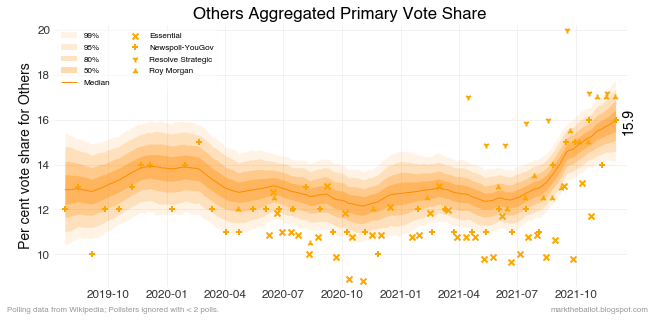

0
Essential           -1.919562
Newspoll-YouGov     -0.867071
Resolve Strategic    2.964862
Roy Morgan          -0.176540
Name: 0.5, dtype: float64


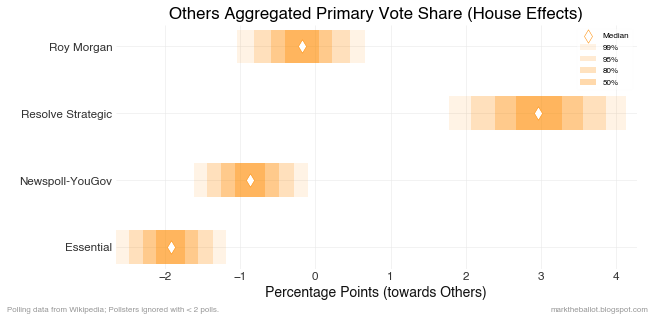

In [13]:
columns = ['Primary vote L/NP', 'Primary vote ALP', 'Primary vote GRN', 'Primary vote OTH', ]
colours = [COLOR_COALITION, COLOR_LABOR, COLOR_GREEN, COLOR_OTHER]
p_colours = [P_COLOR_COALITION, P_COLOR_LABOR, P_COLOR_GREEN, P_COLOR_OTHER]
parties = ['Coalition', 'Labor', 'Greens', 'Others']

for column, colour, p_colour, party in zip(columns, colours, p_colours, parties):
    print('=' * 50)
    print(party, column, party)
    
    fit, first_day, brand_map = common.bayes_poll_aggregation(pv, 
                              poll_column=column,
                              date_column='Mean Date',
                              firm_column='Brand',
                              assumed_sample_size=1000,
                              num_chains=4,
                              num_samples=2_500)
    
    common.bayes_poll_aggregation_plots(df=pv, 
                             fit=fit, 
                             first_day=first_day, 
                             brand_map=brand_map,
                              poll_column=column,
                              date_column='Mean Date',
                              firm_column='Brand',
                                 party=party,
                                 title='Aggregated Primary Vote Share',
                                 line_color=colour,
                                 point_color=p_colour,
                                 s_args=s_args)

    

## Warnings

In [14]:
common.print_warnings()